# Exercise: Plotting data

In this exercise, we will plot some Sentinel-2 data.

## Create a new notebook

First, create a new notebook for this exercise. The following code connects to the Data Cube and imports dependencies. Copy this code into the notebook that you created. Ensure the path in `sys.path.append()` is the correct path to the `Scripts` directory relative to the directory your new notebook is in. Note that `..` refers to the directory above the current directory, so `../..` refers to 2 directories above the one containing the notebook. Now run the notebook.

In [35]:
import datacube
import matplotlib.pyplot as plt

# Allow importing of our utilities.
import sys
# Ensure this path is correct.
sys.path.append('../../Scripts')
from deafrica_datahandling import load_ard

In [36]:
dc = datacube.Datacube(app="04_Loading_data")

## Lookup a location in maps

Use the [Digital Earth Africa Map](https://maps.digitalearth.africa/) to determine the latitude and longitude of a location to load data for.

Click on the lower left (south west) corner of the area to load data for and record the **Lat** and **Lon** values in the "Feature Information" pane in the top right. These are the lower (first) values for `y` and `x` in the query dictionary. If **Lat** ends in "S", it is negative, but if it ends in "N", it is positive. If **Lon** ends in "W", it is negative, but if it ends in "E", it is positive.

Follow the same procedure for the upper right (north east) corner of the area to load data for. These are the upper (second) values for `y` and `x` in the query dictionary.

In the below example, the `y` value for this point is `-7.09418` and the `x` value for this point is `38.98741`.

![deafrica_maps_1](../_static/session_2/07_plotting_01_deafrica_maps_1.png)


Copy this code into the notebook you created to load Sentinel-2 data, substituting `x` and `y` with the values you obtained from the map, and then run it. In this example, data for Dar es Salaam, Tanzania in 2018 is used.

In [37]:
query = dict(dc=dc,
             # Only load acquisitions with 70% or more good data.
             min_gooddata=0.7,
             x=(39.20, 39.37),
             y=(-6.90, -6.70),
             time=("2018-01-01", "2018-12-31"),
             output_crs="EPSG:4326",
             resolution=(-0.00027, 0.00027),
             group_by='solar_day')

In [38]:
sentinel_2_ds = load_ard(products=["s2_l2a"],
                         **query)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 24 out of 71 time steps with at least 70.0% good quality pixels
Applying pixel quality/cloud mask
Loading 24 time steps


## Plotting single bands

The `xarray` package provides built-in methods for plotting individual data variables or measurements.
For example, we might want to make a plot for a single measurement like the green band (band 3 - or `B03` as it is called in our data).

To do this, we first need to access the band as an `xarray.DataArray`.

In [39]:
sentinel_2_ds.B03

<xarray.DataArray 'B03' (time: 24, latitude: 742, longitude: 630)>
array([[[  nan,   nan,   nan, ...,  779.,  750.,  732.],
        [  nan,   nan,   nan, ...,  740.,  808.,  720.],
        [  nan,   nan,   nan, ...,  766.,  748.,  798.],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[ 896.,  966., 1004., ...,  706.,  789.,  702.],
        [1038., 1523., 1238., ...,  714.,  780.,  675.],
        [1204., 1426., 1477., ...,  731.,  767.,  720.],
        ...,
        [ 974., 1109., 1012., ..., 1505., 1288., 1188.],
        [ 887., 1078., 1087., ..., 1629., 1117., 1441.],
        [ 755., 1029., 1324., ..., 1469., 1251., 1725.]],

       [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [  nan,   nan,   nan, ..., 1394., 1344., 1093.],
        [  nan,   nan,   nan, ..., 1567., 1062., 1250.],
        [  nan,   nan,   nan, ..., 1429., 1111., 1681.]],

       ...,

       [[ 969., 1321., 1197., ...,   nan,   nan,   nan],
        [ 968., 1310., 1126., ...,   nan,   nan,   nan],
        [1298., 1495., 1533., ...,   nan,   nan,   nan],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[1057., 1213., 1125., ...,  823.,  767.,  766.],
        [1213., 1453., 1308., ...,  849.,  720.,  757.],
        [1262., 1249., 1480., ...,  773.,  770.,  808.],
        ...,
        [1184., 1234., 1204., ...,  332.,  340.,  263.],
        [ 925., 1286., 1292., ...,  404.,   nan,   nan],
        [ 685., 1062., 1310., ...,  450.,  548.,   nan]],

       [[  nan,   nan, 3503., ...,  819.,  767.,  771.],
        [  nan,   nan, 2951., ...,  890.,  740.,  857.],
        [  nan,   nan, 2668., ...,  897.,  833.,  824.],
        ...,
        [  nan, 1844., 1728., ..., 1020.,  845.,  778.],
        [2263., 1808., 1856., ..., 1427.,  844.,  785.],
        [1472., 1619., 1660., ..., 1663.,  952.,  918.]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-16T07:47:40 ... 2018-12-22T07:51:42
    spatial_ref  int32 4326
  * latitude     (latitude) float64 -6.7 -6.7 -6.7 -6.701 ... -6.899 -6.9 -6.9
  * longitude    (longitude) float64 39.2 39.2 39.2 39.2 ... 39.37 39.37 39.37
Attributes:
    units:         1
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

### Selecting and plotting a single timestep

To make a plot for a single timestep only, we need to select it using either the `sel()` or `isel()` methods discussed in the xarray document in this session.

In [40]:
first_timestep = sentinel_2_ds.B03.isel(time=0)

OR

In [41]:
first_timestep = sentinel_2_ds.B03.sel(time="2018-01-16")

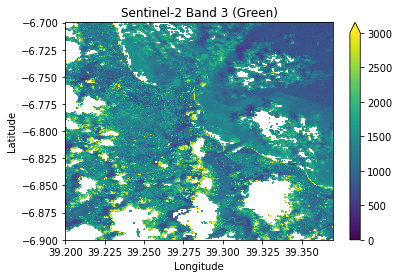

In [42]:
img = first_timestep.plot(vmin=0, vmax=3000)
plt.title('Sentinel-2 Band 3 (Green)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
img.colorbar.ax.set_ylabel('')
plt.show()

### Plotting multiple timesteps
It is often useful to produce plots for a single measurement across time, for example to compare change between satellite observations or summary datasets.

#### Plotting multiple timesteps as images

To plot multiple timesteps in one figure as images, we need to tell the `.plot()` function to put each timestep in a different column or row. We can do this by specifying `.plot(col="time")` or `.plot(row="time")`.

We only select the first 3 times (`.isel(time=slice(0,3))`) so the output is clearly visible.

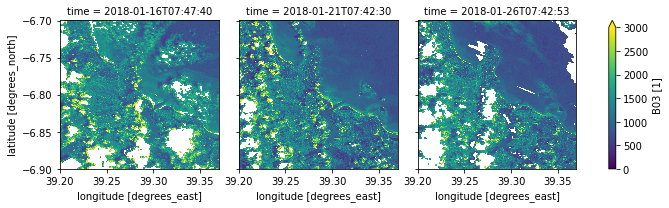

In [43]:
sentinel_2_ds.isel(time=slice(0,3)).B03.plot(col="time", vmin=0, vmax=3000)
plt.show()

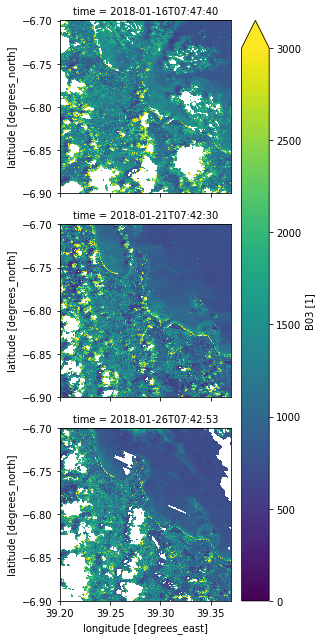

In [44]:
sentinel_2_ds.isel(time=slice(0,3)).B03.plot(row="time", vmin=0, vmax=3000)
plt.show()

> **Note**: This kind of plotting is called "facetted plotting". For more information, refer to the [xarray documentation](http://xarray.pydata.org/en/stable/plotting.html#faceting)

#### Plotting multiple timesteps as a chart

To plot multiple timesteps in one figure as a chart, we need to aggregate values for each timestep before calling `.plot()`. In this case, the mean (average) of band 3 (`B03` - Green) for each timestep is plot as a line plot. The argument `marker='o'` to `.plot()` sets circle markers at the points on the line where the time steps are.

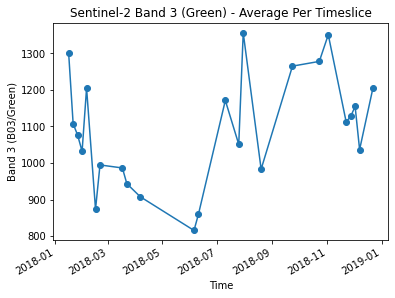

In [45]:
sentinel_2_ds.B03.mean(['latitude', 'longitude']).plot(marker='o')
plt.title('Sentinel-2 Band 3 (Green) - Average Per Timeslice')
plt.xlabel('Time')
plt.ylabel('Band 3 (B03/Green)')
plt.show()

### Customising plot appearance
You may notice that the images above are dark and difficult to see clearly.
To improve the appearance of `xarray` images, you can use the `robust=True` argument to optimise the plot colours by clipping extreme values or outliers. 
This will use the 2nd and 98th percentiles of the data to compute the color limits:

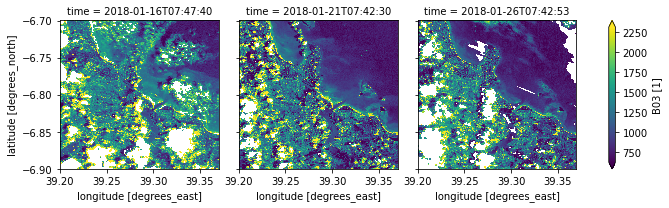

In [46]:
sentinel_2_ds.isel(time=slice(0,3)).B03.plot(col="time", robust=True)

We can also easily use custom colour maps/styles to visualise our data using the `cmap` parameter.

When choosing a colour map for a plot, it is important to choose a set of colours that are perceived logically by the human eye. 
The best colour maps are "perceptually uniform". These colour maps increase logically from dark to light colours, where equal increases in lightness/darkness correspond to equal changes in data values. 
Some best-practice perceptually uniform colour maps include:

```
"viridis", "plasma", "inferno", "magma", "cividis"
```

> **Note**: For further reading about perceptually uniform colour maps in data visualisation, refer to the [matplotlib documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

It is also important to consider colour blindness when selecting a colour map. 
`xarray` supports many colour maps from the "colorbrewer" family of colour maps which are optimised for colour blindness.
You can use the interactive [online tool](http://colorbrewer2.org) to browse all available colour maps, or choose from one of the following commonly used options:

```
"Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
"YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", 
"GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"
```

For a full list of available colour maps you can refer to [this list](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html).

For example, to plot our data with the perceptually uniform `magma` colour map:


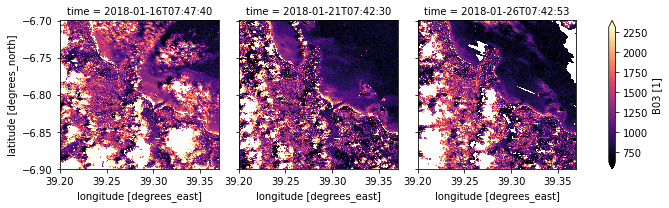

In [47]:
sentinel_2_ds.isel(time=slice(0,3)).B03.plot(col="time", robust=True, cmap="magma")

## Plotting multiple bands

Multiple data variables can be plot in several ways. The data variables can be plot as RGB images - with each channel (red, green, blue) in the image mapping to a data variable, or, less commonly, some combination of data variables. The data variables can also be plot together as a chart.

### RGB Images

RGB images can be either true-color or false-color. True-color RGB images map the red band (a data variable in the `xarray.Dataset` object from the Data Cube) to the red channel in the image, and similarly for the green and blue channels. In contrast, false-color RGB images map other bands to some or all of the RGB channels. Any RGB image that is not true-color is false-color.

To create RGB images, we use one of our utility functions, `rgb()`.

In [48]:
from deafrica_plotting import rgb

Here is an example of a true-color RGB image. The bands 4, 3, and 2 are approximately red, green, and blue, respectively, for Sentinel-2. See [this graphic](https://sentinel.esa.int/image/image_gallery?uuid=c5fa6c3e-2978-4fb8-ac95-3be9c5171be2&groupId=247904&t=1345630320883) for a visualization of these Sentinel-2 bands relative to the visible spectrum of light.

See [this webpage](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/resolutions/spatial) for a visualization of all spectral bands.

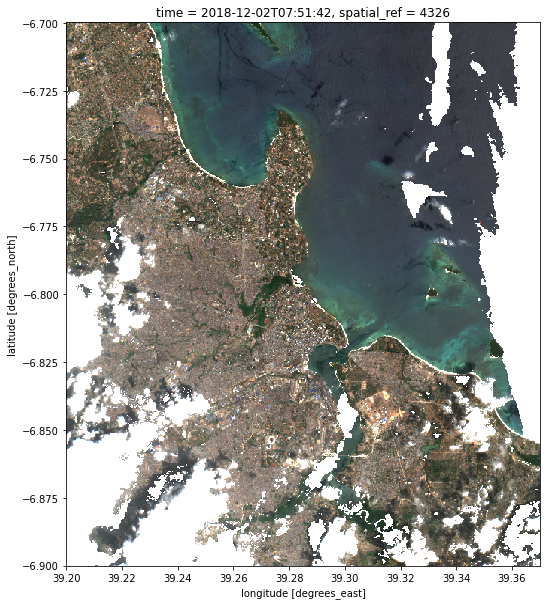

In [49]:
rgb(sentinel_2_ds.sel(time="2018-12-02"), bands=['B04', 'B03', 'B02'], 
    vmin=0, vmax=3000, size=10)

Here is an example of a false-color RGB image. The bands 11, B8a, and 3 for Sentinel-2 approximately equate to the swir1, nir, and green bands for Landsat 8. See the Landsat 8 table on [this webpage](https://www.usgs.gov/faqs/what-are-best-landsat-spectral-bands-use-my-research?qt-news_science_products=0#qt-news_science_products) for the wavelengths of the spectral bands. When comparing them to the [Sentinel-2 bands](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/resolutions/spatial), you will see that the wavelengths of the swir1, nir, and green Landsat 8 bands approximately match these Sentinel-2 bands.

This band combination (`swir1`, `nir`, `green`) emphasises growing vegetation in green, and water in deep blue

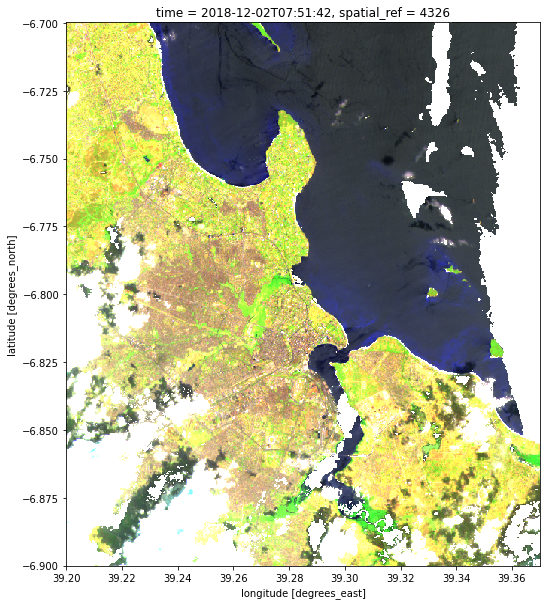

In [50]:
rgb(sentinel_2_ds.sel(time="2018-12-02"), bands=['B11', 'B8A', 'B03'], 
    vmin=0, vmax=3000, size=10)

### Plotting multiple bands as a chart

Below is an example of plotting multiple data variables of an xarray as a line plot - here, the bands are red (band 4 - `B04`), green (band 3 - `B03`) and blue (band 2 - `B02`).

Note that to select several data variables, we use an extra pair of square brackets (`[]`) around the data variable names than when selecting a single data variable (e.g. `['B03']`, which can also be selected with `.B03`.

As in the case of the single data variable plot, the mean is obtained for each timestep.

However, since we selected multiple data variables, the data at this point is an `xarray.Dataset` instead of an `xarray.DataArray`, so we must put `.to_array()` to convert the data to an `xarray.DataArray` to call `.plot.line(x="time")`, since `to_array()` converts the data variables to a dimension called `variable`. Since the only remaining dimensions are `time` and `variable`, `.plot.line(x="time")` plots the data with `time` on the x-axis and the data variables' values as color-coded lines.

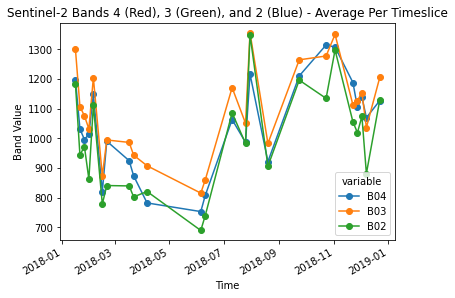

In [51]:
sentinel_2_ds[['B04', 'B03', 'B02']].mean(['latitude', 'longitude'])\
    .to_array().plot.line(x='time', marker='o')
plt.title('Sentinel-2 Bands 4 (Red), 3 (Green), and 2 (Blue) - '
          'Average Per Timeslice')
plt.xlabel('Time')
plt.ylabel('Band Value')
plt.show()

## Learn more

More information about `xarray` plotting can be found [here](http://xarray.pydata.org/en/stable/plotting.html).